<a href="https://colab.research.google.com/github/cheronoF/GitPractice/blob/main/Covid_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Loading our dataset

In [ ]:
                                                                                                                                                                                                                                                                                                        # Installing the libraries we will need
!pip install researchpy
!pip install factor_analyzer==0.2.3

In [ ]:
# Importing the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Dataset url = https://docs.google.com/spreadsheets/d/1G2d2IBrGsrIZI1dBunv1H5iUbVmz6p2g/edit?usp=sharing&ouid=106805906085365476424&rtpof=true&sd=true
covid = pd.read_excel('/content/COVID_vaccine_data.xlsx', sheet_name='COVID_vaccine', na_values=' ')

# 2. Previewing our dataset

In [ ]:
# Checking number of records
covid.shape

(2978, 95)

In [ ]:
# 
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2978 entries, 0 to 2977
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   healthcare_worker                          2966 non-null   float64       
 1   family_member_covid                        2706 non-null   float64       
 2   family_member_covid_test                   772 non-null    float64       
 3   fam_mem_covid_dx                           930 non-null    float64       
 4   fm_mem_covid_hospitalized                  361 non-null    float64       
 5   covid_follow                               2952 non-null   float64       
 6   covid_information_source___1               2978 non-null   int64         
 7   covid_information_source___2               2978 non-null   int64         
 8   covid_information_source___3               2978 non-null   int64         
 9   covid_information_s

In [ ]:
# Previewing the top of our dataset
covid.head()

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,covid_information_source___8,covid_information_source___9,covid_information_source___10,confine,job,infection,food,death,hospital_access,covid_state,sd,ld,hw,fm,er,reopening,second_wave,number,state,belief,age,child,smoke,dm,immune,pregnant,hosp_rate,...,covid_symptoms___4,covid_symptoms___5,vaccine_pcv_flu,mask_gloves___1,mask_gloves___2,social_distance_feet,isolation,corona_live,spread___1,spread___2,spread___3,spread___4,chloroquin,drug_trial,vaccine_trial,hospital,vent,administration,new_vaccine,new_medication,covid_vaccine,covid_vaccine_cause___1,covid_vaccine_cause___2,covid_vaccine_cause___3,covid_vaccine_cause___4,covid_vaccine_cause___5,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,US_State,Census_region,Region,Vaccine_Launch (PRE_POST),summary_explanation_of_research_timestamp,Knowledge_normalized,Perceived_threat_normalized
0,1.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,NaN,0,1,1,0,1,3.0,3.0,3.0,3.0,4.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,1.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,1,NaN,NaN,NaN,NaN,NaN,1.0,9.0,Female,4.0,5.0,White,3.0,Florida,South Atlantic,South,No,2020-05-30 17:00:00,7.496125,4.871027
1,0.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,0.0,0,0,0,0,0,3.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,1,1,1.0,1,0,1.0,1.0,1.0,1,1,1,1,1.0,3.0,3.0,4.0,3.0,2.0,3.0,2.0,1,NaN,NaN,NaN,NaN,NaN,1.0,8.0,Male,2.0,5.0,Asian,3.0,New York,Mid-Atlantic,Northeast,No,2020-05-31 07:16:00,NaN,3.947653
2,1.0,1.0,0.0,NaN,NaN,3.0,1,0,1,1,0.0,0,0,1,1,0,5.0,1.0,4.0,1.0,4.0,1.0,4.0,5.0,4.0,5.0,4.0,4.0,1.0,4.0,1.0,2.0,3.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,...,1,1,1.0,1,1,1.0,1.0,1.0,1,1,1,0,0.5,2.0,2.0,5.0,5.0,1.0,3.0,4.0,1,NaN,NaN,NaN,NaN,NaN,1.0,10.0,Female,3.0,4.0,White,3.0,Pennsylvania,Mid-Atlantic,Northeast,No,2020-06-01 08:07:00,NaN,5.812587
3,1.0,0.0,NaN,NaN,NaN,6.0,0,1,0,1,1.0,0,1,1,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,1.0,5.0,1.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,1.0,0,1,1.0,1.0,1.0,1,1,1,1,0.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,1.0,8.0,Female,2.0,2.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,2020-06-01 08:44:00,6.246485,NaN
4,1.0,1.0,1.0,0.0,NaN,6.0,1,0,0,0,1.0,0,0,0,0,0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,0.0,2.0,2.0,5.0,5.0,5.0,2.0,2.0,0,NaN,NaN,NaN,NaN,NaN,1.0,9.0,Female,2.0,1.0,White,2.0,Pennsylvania,Mid-Atlantic,Northeast,No,2020-06-01 08:57:00,6.228922,5.329589


In [ ]:
# Previewing the bottom of our dataset
covid.tail()

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,covid_information_source___8,covid_information_source___9,covid_information_source___10,confine,job,infection,food,death,hospital_access,covid_state,sd,ld,hw,fm,er,reopening,second_wave,number,state,belief,age,child,smoke,dm,immune,pregnant,hosp_rate,...,covid_symptoms___4,covid_symptoms___5,vaccine_pcv_flu,mask_gloves___1,mask_gloves___2,social_distance_feet,isolation,corona_live,spread___1,spread___2,spread___3,spread___4,chloroquin,drug_trial,vaccine_trial,hospital,vent,administration,new_vaccine,new_medication,covid_vaccine,covid_vaccine_cause___1,covid_vaccine_cause___2,covid_vaccine_cause___3,covid_vaccine_cause___4,covid_vaccine_cause___5,flu_shot_y_n,confidence_level,Gender_string,your_age,your_education,your_race,financial_status,US_State,Census_region,Region,Vaccine_Launch (PRE_POST),summary_explanation_of_research_timestamp,Knowledge_normalized,Perceived_threat_normalized
2973,0.0,NaN,NaN,0.0,NaN,4.0,0,1,0,0,0.0,0,0,1,0,0,1.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1.0,1,1,1.0,1.0,0.0,0,1,0,0,1.0,4.0,5.0,5.0,2.0,1.0,2.0,3.0,1,0.0,0.0,0.0,0.0,1.0,1.0,6.0,Male,2.0,2.0,White,2.0,North Carolina,South Atlantic,NaN,Yes,2021-01-06 14:40:00,8.534186,6.069682
2974,0.0,0.0,NaN,0.0,NaN,6.0,0,1,0,1,0.0,0,1,0,0,0,5.0,4.0,3.0,2.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,3.0,3.0,1.0,5.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,1,1.0,1,1,1.0,1.0,0.0,0,1,1,1,0.5,1.0,1.0,5.0,3.0,3.0,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,1.0,8.0,Female,3.0,2.0,White,2.0,Tennessee,East South Central,NaN,Yes,2021-01-06 16:48:00,8.391780,6.312461
2975,0.0,NaN,NaN,0.0,NaN,3.0,1,1,1,1,0.0,0,0,0,1,0,2.0,1.0,3.0,1.0,1.0,1.0,3.0,5.0,3.0,5.0,5.0,5.0,2.0,2.0,1.0,1.0,4.0,0.0,0.0,NaN,1.0,1.0,0.0,0.0,...,1,1,0.0,1,0,1.0,1.0,1.0,1,1,1,0,0.5,3.0,3.0,4.0,3.0,5.0,1.0,2.0,1,1.0,1.0,1.0,1.0,1.0,1.0,9.0,Male,4.0,2.0,Black,2.0,New York,Mid-Atlantic,NaN,Yes,2021-01-06 17:19:00,NaN,2.492443
2976,1.0,NaN,NaN,0.0,NaN,3.0,1,0,0,1,0.0,0,1,1,0,0,3.0,2.0,3.0,2.0,3.0,1.0,4.0,5.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,1,1.0,1,1,1.0,0.0,1.0,0,1,1,1,1.0,5.0,5.0,5.0,5.0,4.0,1.0,3.0,1,0.0,0.0,0.0,0.0,1.0,1.0,9.0,Male,4.0,4.0,White,2.0,Utah,Mountain,NaN,Yes,2021-01-06 17:57:00,9.148600,4.053332
2977,0.0,1.0,1.0,1.0,0.0,6.0,1,0,0,0,0.0,0,0,0,0,0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,3.0,1.0,2.0,0.0,NaN,NaN,1.0,1.0,1.0,1.0,...,1,1,0.0,1,1,1.0,1.0,1.0,1,1,1,1,1.0,2.0,3.0,5.0,3.0,5.0,1.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,9.0,Female,5.0,NaN,NaN,2.0,NaN,NaN,NaN,Yes,2021-01-06 18:07:00,NaN,2.862377


In [ ]:
# Checking column types
covid.dtypes

healthcare_worker                                   float64
family_member_covid                                 float64
family_member_covid_test                            float64
fam_mem_covid_dx                                    float64
fm_mem_covid_hospitalized                           float64
                                                  ...      
Region                                               object
Vaccine_Launch (PRE_POST)                            object
summary_explanation_of_research_timestamp    datetime64[ns]
Knowledge_normalized                                float64
Perceived_threat_normalized                         float64
Length: 95, dtype: object

# 3. Cleaning our dataset

## 3.1 Dropping uneccessary columns

In [ ]:
# Specifying the irrelevant columns
irrelevant = ['Perceived_threat_normalized', 'Knowledge_normalized', 'summary_explanation_of_research_timestamp', 'Region', 'US_State', 'confidence_level']
covid.drop(columns=irrelevant, inplace=True)

## 3.2 Missing data

In [ ]:
# Checking for missing values
# Columns that should not have missing values
interest = ['covid_vaccine', 'Gender_string', 'your_age', 'your_education', 'your_race', 'financial_status', 'Census_region', 'healthcare_worker']
for i in interest:
  print(i, covid[i].isnull().sum())

covid_vaccine 0
Gender_string 44
your_age 16
your_education 32
your_race 104
financial_status 10
Census_region 64
healthcare_worker 12


In [ ]:
# Dropping null values
covid.dropna(axis=0, subset=interest, inplace=True)

In [ ]:
covid.shape

(2760, 89)

## 3.3 Duplicates


In [ ]:
# Checking for duplicates
covid.duplicated().any()

False

## 3.4 Anomalies/Outliers

In [ ]:
for i in interest:
  print(i, covid[i].unique())

covid_vaccine [1 0]
Gender_string ['Female' 'Male']
your_age [4. 2. 3. 5. 1.]
your_education [5. 4. 2. 1. 3.]
your_race ['White' 'Asian' 'Black' 'Hispanic' 'Other']
financial_status [3. 2. 4. 1.]
Census_region ['South Atlantic' 'Mid-Atlantic' 'East North Central' 'East South Central'
 'Pacific' 'West North Central' 'West South Central' 'New England'
 'Mountain']
healthcare_worker [1. 0.]


# 4. Exploratory Data Analysis 

In [ ]:
# Creating a copy of the dataset for exploratory data analysis
covid_eda = covid.copy()
covid_eda.head()

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,covid_information_source___8,covid_information_source___9,covid_information_source___10,confine,job,infection,food,death,hospital_access,covid_state,sd,ld,hw,fm,er,reopening,second_wave,number,state,belief,age,child,smoke,dm,immune,pregnant,hosp_rate,...,hot_beverages,hand_sanitize,baby_wipes,covid_symptoms___1,covid_symptoms___2,covid_symptoms___3,covid_symptoms___4,covid_symptoms___5,vaccine_pcv_flu,mask_gloves___1,mask_gloves___2,social_distance_feet,isolation,corona_live,spread___1,spread___2,spread___3,spread___4,chloroquin,drug_trial,vaccine_trial,hospital,vent,administration,new_vaccine,new_medication,covid_vaccine,covid_vaccine_cause___1,covid_vaccine_cause___2,covid_vaccine_cause___3,covid_vaccine_cause___4,covid_vaccine_cause___5,flu_shot_y_n,Gender_string,your_age,your_education,your_race,financial_status,Census_region,Vaccine_Launch (PRE_POST)
0,1.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,NaN,0,1,1,0,1,3.0,3.0,3.0,3.0,4.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,1.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,1,NaN,NaN,NaN,NaN,NaN,1.0,Female,4.0,5.0,White,3.0,South Atlantic,No
1,0.0,0.0,NaN,NaN,NaN,5.0,1,0,0,1,0.0,0,0,0,0,0,3.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,0,1.0,1.0,1.0,1,1,1,1,1.0,3.0,3.0,4.0,3.0,2.0,3.0,2.0,1,NaN,NaN,NaN,NaN,NaN,1.0,Male,2.0,5.0,Asian,3.0,Mid-Atlantic,No
2,1.0,1.0,0.0,NaN,NaN,3.0,1,0,1,1,0.0,0,0,1,1,0,5.0,1.0,4.0,1.0,4.0,1.0,4.0,5.0,4.0,5.0,4.0,4.0,1.0,4.0,1.0,2.0,3.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,1.0,1,1,1,0,0.5,2.0,2.0,5.0,5.0,1.0,3.0,4.0,1,NaN,NaN,NaN,NaN,NaN,1.0,Female,3.0,4.0,White,3.0,Mid-Atlantic,No
3,1.0,0.0,NaN,NaN,NaN,6.0,0,1,0,1,1.0,0,1,1,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,1.0,5.0,1.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1,1,1,0,0,1.0,0,1,1.0,1.0,1.0,1,1,1,1,0.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,1.0,Female,2.0,2.0,White,2.0,Mid-Atlantic,No
4,1.0,1.0,1.0,0.0,NaN,6.0,1,0,0,0,1.0,0,0,0,0,0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,0.0,2.0,2.0,5.0,5.0,5.0,2.0,2.0,0,NaN,NaN,NaN,NaN,NaN,1.0,Female,2.0,1.0,White,2.0,Mid-Atlantic,No


In [ ]:
# Creating a user defined action to change values from numerical to categorical
def str_categorize(df, column, replace, replace_with):
  df[column].replace(to_replace=replace, value=replace_with, inplace=True)
  return df.head()

In [ ]:
# Changing values from numerical to categorical
str_categorize(covid_eda, 'covid_vaccine', [0,1], ['no', 'yes'])
str_categorize(covid_eda, 'your_age', [1,2,3,4,5,6], ['18-24', '25-44', '45-60', '61-70', '>70', 'prefer not to answer'])
str_categorize(covid_eda, 'your_education', [1,2,3,4,5,6,7,8,9], ['Middle school or less', 'Highschool', 'Undergraduate', 'Graduate', 'Masters', 'Doctorate', 'Professional degree', 'Other', 'Prefer not to say'])
str_categorize(covid_eda, 'financial_status', [1,2,3,4], ['Lower middle class/poor', 'Middle class', 'Upper middle class', 'Wealthy'])
str_categorize(covid_eda, 'healthcare_worker', [0,1], ['no', 'yes'])

,healthcare_worker,family_member_covid,family_member_covid_test,fam_mem_covid_dx,fm_mem_covid_hospitalized,covid_follow,covid_information_source___1,covid_information_source___2,covid_information_source___3,covid_information_source___4,covid_information_source___5,covid_information_source___6,covid_information_source___7,covid_information_source___8,covid_information_source___9,covid_information_source___10,confine,job,infection,food,death,hospital_access,covid_state,sd,ld,hw,fm,er,reopening,second_wave,number,state,belief,age,child,smoke,dm,immune,pregnant,hosp_rate,...,hot_beverages,hand_sanitize,baby_wipes,covid_symptoms___1,covid_symptoms___2,covid_symptoms___3,covid_symptoms___4,covid_symptoms___5,vaccine_pcv_flu,mask_gloves___1,mask_gloves___2,social_distance_feet,isolation,corona_live,spread___1,spread___2,spread___3,spread___4,chloroquin,drug_trial,vaccine_trial,hospital,vent,administration,new_vaccine,new_medication,covid_vaccine,covid_vaccine_cause___1,covid_vaccine_cause___2,covid_vaccine_cause___3,covid_vaccine_cause___4,covid_vaccine_cause___5,flu_shot_y_n,Gender_string,your_age,your_education,your_race,financial_status,Census_region,Vaccine_Launch (PRE_POST)
0,yes,0.0,NaN,NaN,NaN,5.0,1,0,0,1,NaN,0,1,1,0,1,3.0,3.0,3.0,3.0,4.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,1.0,3.0,2.0,5.0,5.0,5.0,3.0,4.0,yes,NaN,NaN,NaN,NaN,NaN,1.0,Female,61-70,Masters,White,Upper middle class,South Atlantic,No
1,no,0.0,NaN,NaN,NaN,5.0,1,0,0,1,0.0,0,0,0,0,0,3.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,0,1.0,1.0,1.0,1,1,1,1,1.0,3.0,3.0,4.0,3.0,2.0,3.0,2.0,yes,NaN,NaN,NaN,NaN,NaN,1.0,Male,25-44,Masters,Asian,Upper middle class,Mid-Atlantic,No
2,yes,1.0,0.0,NaN,NaN,3.0,1,0,1,1,0.0,0,0,1,1,0,5.0,1.0,4.0,1.0,4.0,1.0,4.0,5.0,4.0,5.0,4.0,4.0,1.0,4.0,1.0,2.0,3.0,1.0,1.0,NaN,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,1.0,1,1,1,0,0.5,2.0,2.0,5.0,5.0,1.0,3.0,4.0,yes,NaN,NaN,NaN,NaN,NaN,1.0,Female,45-60,Graduate,White,Upper middle class,Mid-Atlantic,No
3,yes,0.0,NaN,NaN,NaN,6.0,0,1,0,1,1.0,0,1,1,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,1.0,5.0,1.0,4.0,1.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1,1,1,0,0,1.0,0,1,1.0,1.0,1.0,1,1,1,1,0.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,no,NaN,NaN,NaN,NaN,NaN,1.0,Female,25-44,Highschool,White,Middle class,Mid-Atlantic,No
4,yes,1.0,1.0,0.0,NaN,6.0,1,0,0,0,1.0,0,0,0,0,0,2.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1,1,1,1,1,1.0,1,1,1.0,1.0,0.0,1,1,1,1,0.0,2.0,2.0,5.0,5.0,5.0,2.0,2.0,no,NaN,NaN,NaN,NaN,NaN,1.0,Female,25-44,Middle school or less,White,Middle class,Mid-Atlantic,No


## 4.1 Univariate Analysis

In [ ]:
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    covid_eda[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(7, 6), rot=90)
  elif kind == 'bar':
    covid_eda[column].value_counts().plot(kind=kind, figsize=(10, 8), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

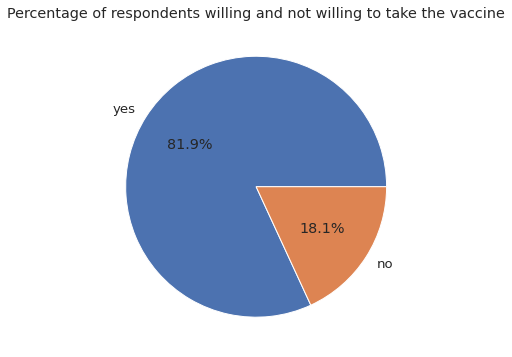

In [ ]:
# Pie chart showing the percentage of respondents willing and not willing to take the vaccine
uni_visuals('covid_vaccine', 'pie', 'Percentage of respondents willing and not willing to take the vaccine', '', '')

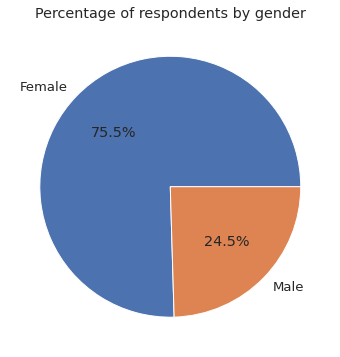

In [ ]:
# Pie chart showing the percentage of respondents by gender
uni_visuals('Gender_string', 'pie', 'Percentage of respondents by gender', '', '')

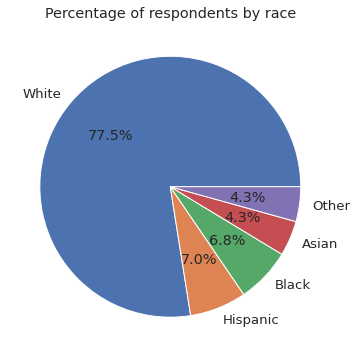

In [ ]:
# Pie chart showing the percentage of respondents by race
uni_visuals('your_race', 'pie', 'Percentage of respondents by race', '', '')

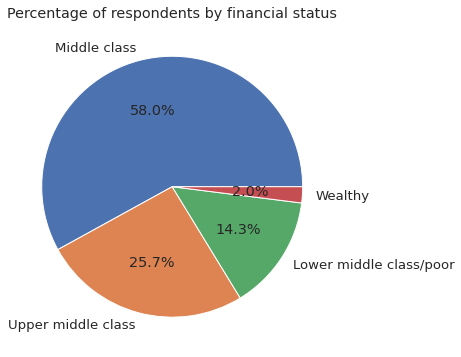

In [ ]:
# Pie chart showing the percentage of respondents by financial status
uni_visuals('financial_status', 'pie', 'Percentage of respondents by financial status', '', '')

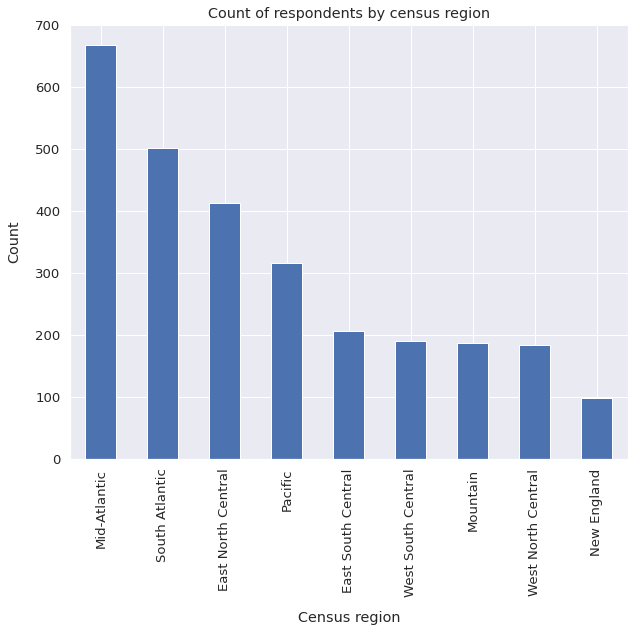

In [ ]:
# Bar chart showing count of respondents by census region
uni_visuals('Census_region', 'bar', 'Count of respondents by census region', 'Census region', 'Count')

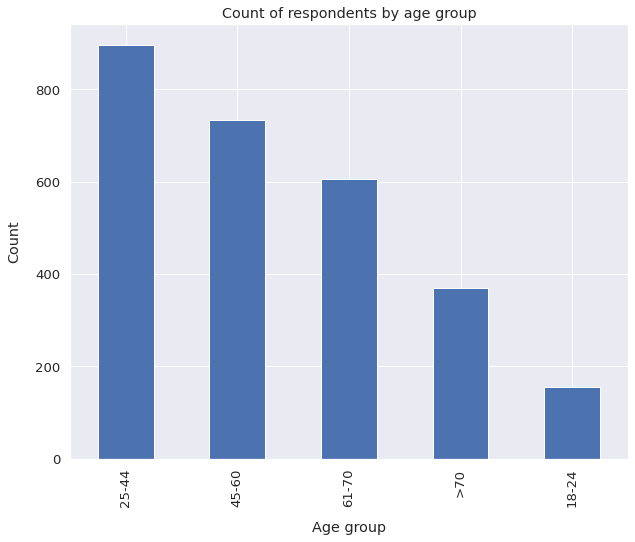

In [ ]:
# Bar chart showing count of respondents by age group
uni_visuals('your_age', 'bar', 'Count of respondents by age group', 'Age group', 'Count')

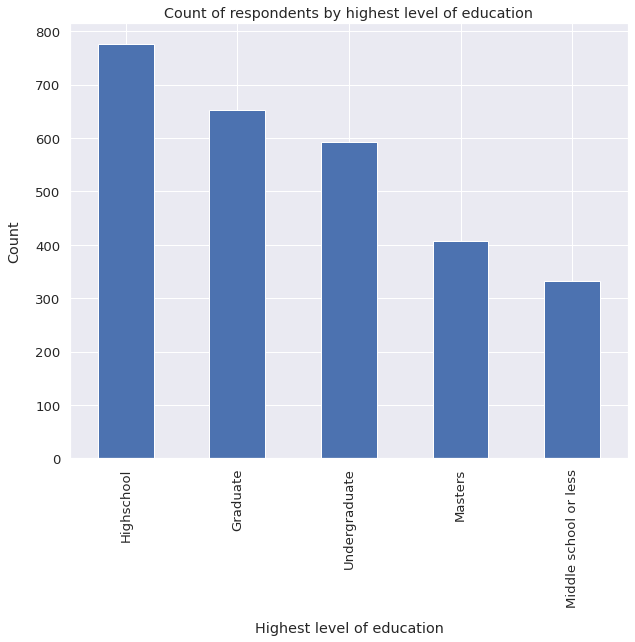

In [ ]:
# Bar chart showing count of respondents by highest level of education
uni_visuals('your_education', 'bar', 'Count of respondents by highest level of education', 'Highest level of education', 'Count')

## 4.2 Bivariate Analysis

In [ ]:
def bi_visuals(column, title, xlabel, ylabel):
  crosstab = rp.crosstab(covid_eda[column], covid_eda['covid_vaccine'], prop = 'row')
  crosstab['covid_vaccine'][['no','yes']].drop('All').plot(kind = 'bar', stacked = True, figsize = (8,6))
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1.02)
  return plt.show()

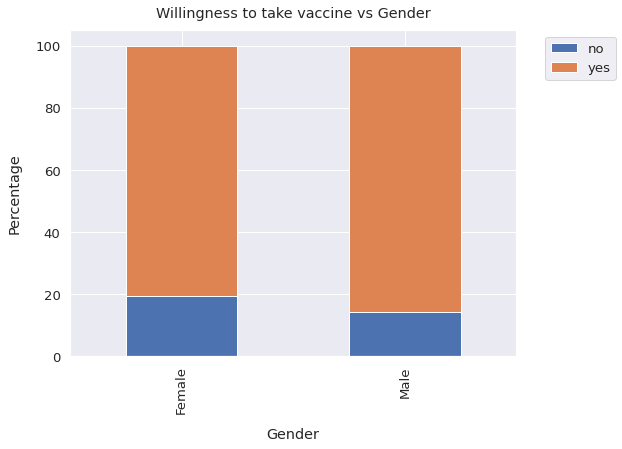

In [ ]:
# Willingness to take the vaccine vs gender
bi_visuals('Gender_string', 'Willingness to take vaccine vs Gender', 'Gender', 'Percentage')

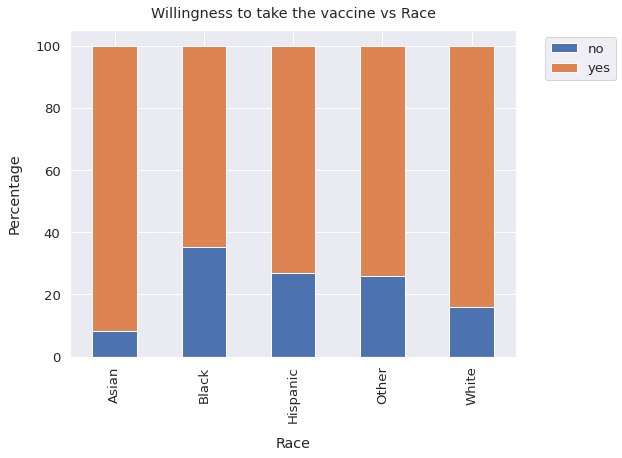

In [ ]:
# Willingness to take the vaccine vs race
bi_visuals('your_race', 'Willingness to take the vaccine vs Race', 'Race', 'Percentage')

A larger percentage of black people are unlikely to take the vaccine compared to people of other races.

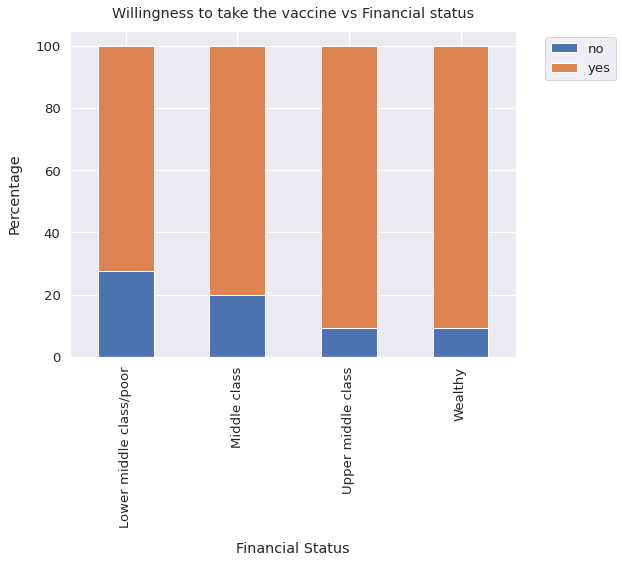

In [ ]:
# Willingness to take the vaccine vs financial status
bi_visuals('financial_status', 'Willingness to take the vaccine vs Financial status', 'Financial Status', 'Percentage')

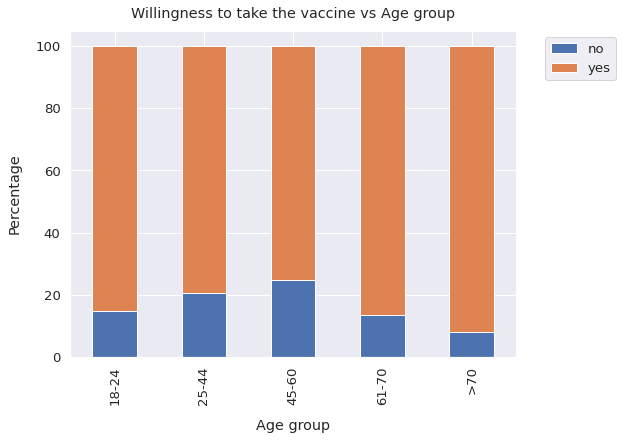

In [ ]:
# Willingness to take the vaccine vs age group
bi_visuals('your_age', 'Willingness to take the vaccine vs Age group', 'Age group', 'Percentage')

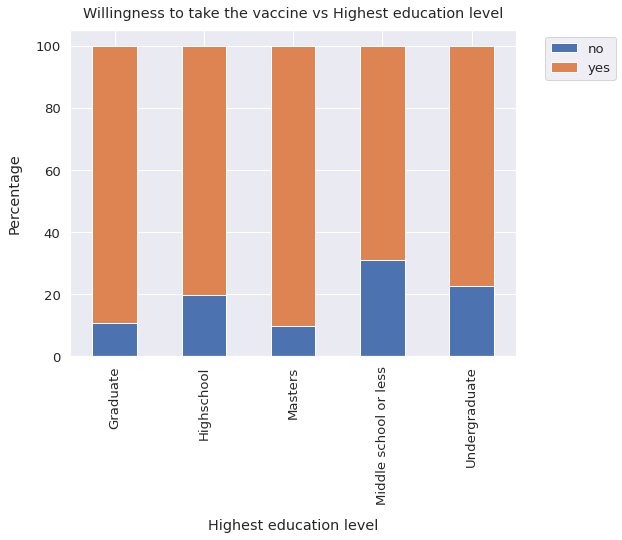

In [ ]:
# Willingness to take the vaccine vs Highest education level
bi_visuals('your_education', 'Willingness to take the vaccine vs Highest education level', 'Highest education level', 'Percentage')

## 4.3 Multivariate Analysis

We will conduct factor analysis to reduce the number of variables

In [ ]:
# Selecting the variables that we will conduct factor analysis on
# These variables are chosen because they are ordinal 
covid_multi = covid[['confine', 'job', 'infection', 'food', 'death', 'hospital_access', 'covid_state', 'sd', 'ld', 'hw', 'fm', 'er', 'reopening', 
                     'second_wave', 'number', 'state', 'belief', 'chloroquin', 'drug_trial', 'vaccine_trial', 'hospital', 'vent', 'administration', 
                     'social_distance_feet', 'isolation', 'corona_live', 'new_vaccine', 'new_medication']]
covid_multi.head()

,confine,job,infection,food,death,hospital_access,covid_state,sd,ld,hw,fm,er,reopening,second_wave,number,state,belief,chloroquin,drug_trial,vaccine_trial,hospital,vent,administration,social_distance_feet,isolation,corona_live,new_vaccine,new_medication
0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,5.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,4.0,5.0,1.0,3.0,2.0,5.0,5.0,5.0,1.0,1.0,0.0,3.0,4.0
1,3.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,1.0,3.0,3.0,4.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0
2,5.0,1.0,4.0,1.0,4.0,1.0,4.0,5.0,4.0,5.0,4.0,4.0,1.0,4.0,1.0,2.0,3.0,0.5,2.0,2.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,4.0
3,4.0,4.0,4.0,4.0,NaN,NaN,NaN,4.0,1.0,5.0,1.0,4.0,1.0,3.0,1.0,2.0,3.0,0.0,5.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0
4,2.0,2.0,3.0,2.0,4.0,2.0,3.0,5.0,5.0,5.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,0.0,2.0,2.0,5.0,5.0,5.0,1.0,1.0,0.0,2.0,2.0


In [ ]:
# Checking our number of variables to reduce
covid_multi.shape[1]

28

In [ ]:
# Dropping null values
covid_multi.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Confirming that our variable types are numerical
covid_multi.dtypes

confine                 float64
job                     float64
infection               float64
food                    float64
death                   float64
hospital_access         float64
covid_state             float64
sd                      float64
ld                      float64
hw                      float64
fm                      float64
er                      float64
reopening               float64
second_wave             float64
number                  float64
state                   float64
belief                  float64
chloroquin              float64
drug_trial              float64
vaccine_trial           float64
hospital                float64
vent                    float64
administration          float64
social_distance_feet    float64
isolation               float64
corona_live             float64
new_vaccine             float64
new_medication          float64
dtype: object

Before we conduct factor analysis, we need to check that our dataset is factorable. 

To do this we will conduct Bartlett’s test of sphericity which compares an observed correlation matrix with the identity matrix

Null: Variables are not correlated i.e. not factorable

Alt: Variables are correlated enough i.e factorable

In [ ]:
# Importing Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Conducting the test
chi_square_value,p_value=calculate_bartlett_sphericity(covid_multi)
p_value

0.0

Our p value is less than 0.05 therefore we reject the null hypothesis and conclude that our variables are factorable

The second test is the Kaiser-Meyer-Olkin (KMO) Test which measures the suitability of data for factor analysis.

A KMO value of less than 0.6 is considered inadequate.

In [ ]:
# Importing the KMO test
from factor_analyzer.factor_analyzer import calculate_kmo

# Conducting the test
kmo_all,kmo_model=calculate_kmo(covid_multi)

In [ ]:
# Finding out our results
kmo_model

0.842591135926838

The overall KMO for our dataset is 0.84 which is adequate

To determine the number of factors we will use the kaiser rule which is to drop all components with eigenvalues under 1.0. 

In [ ]:
# Importing factor analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(covid_multi, 28, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.566841
1,2.921361
2,1.954688
3,1.634594
4,1.277305
5,1.202537
6,1.049139
7,0.994800
8,0.967442
9,0.885669


As shown above 7 factors have an eigen value greater than one so we will chose 7 factors only

We can visualize the eigen-values with a scree plot

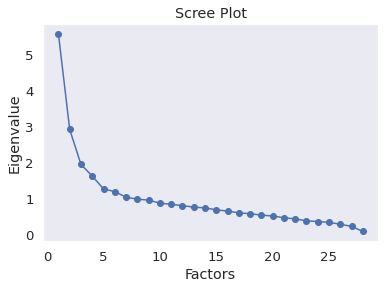

In [ ]:
# Creating the scree plot
plt.scatter(range(1,covid_multi.shape[1]+1),ev)
plt.plot(range(1,covid_multi.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(covid_multi, 7, rotation="varimax")
# Showing our factor loadings
# Factor loadings indicate how much a factor explains a variable
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
confine,-0.047068,0.478088,-0.049243,0.028046,0.032118,0.009404,-0.017151
job,-0.100274,0.570159,-0.016463,-0.089799,0.129754,0.030154,0.058258
infection,0.446782,0.611452,0.048289,-0.019598,-0.043236,-0.067832,-0.011969
food,-0.021032,0.675764,0.041171,-0.097752,0.121229,-0.098196,-0.006184
death,0.285131,0.589856,0.031765,-0.036454,-0.050674,0.016130,0.017733
hospital_access,0.026255,0.551773,0.048686,-0.321251,0.017897,-0.109170,0.004685
covid_state,0.384932,0.530034,0.031028,-0.115292,-0.086917,-0.122527,-0.211808
sd,0.747853,0.002891,-0.059989,0.038463,-0.075835,-0.003128,0.286806
ld,0.839503,0.074328,-0.026926,-0.092910,0.057247,-0.078208,0.047170
hw,0.397408,0.138177,-0.003408,0.090162,0.028373,-0.000021,0.212110


In [ ]:
# Factor 1 - sd, ld, fm, reopening, second_wave, number, chloroquin, belief, state, hw, corona_live []
# Factor 2 - confine, job, infection, food, death, hospital_access, covid_state [Stress Related to COVID-19 Pandemic]
# Factor 3 - drug_trial, vaccine_trial [Willingness to participate in trials] 
# Factor 4 - hospital, vent, administration [Thoughts about your local hospital]
# Factor 5 - new_vaccine, new_medication [Future Hope]
# Factor 6 - er, isolation, social_distance_feet [Knowledge of COVID]
# Factor 7 -

In [ ]:
# Factor 7 has no high factor loadings for any variable so we performed factor analysis for 6 factors
fa = FactorAnalyzer()
fa.analyze(covid_multi, 6, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
confine,-0.043839,0.481497,-0.049341,0.024372,0.028188,0.021773
job,-0.098817,0.564804,-0.015553,-0.079417,0.124132,-0.004353
infection,0.457106,0.608942,0.051385,-0.030815,-0.040314,-0.031346
food,-0.007987,0.676837,0.039827,-0.098235,0.129806,-0.093036
death,0.286944,0.584435,0.034560,-0.040726,-0.052759,0.013968
hospital_access,0.034601,0.548035,0.046276,-0.317754,0.033102,-0.140902
covid_state,0.394475,0.525122,0.031031,-0.158897,-0.077071,-0.015553
sd,0.726782,-0.009090,-0.055506,0.061956,-0.061188,-0.036707
ld,0.848436,0.060946,-0.019004,-0.100318,0.057418,-0.035934
hw,0.395665,0.125314,-0.000359,0.111133,0.031169,-0.035111


Factor 1 - Opinions on COVID-19
1. sd - Social distancing helps
2. ld - 'Lockdown' or 'stay at home' orders are justified
3. hw - 'Handwash for 20 seconds' whenever needed, is useful
4. fm - 'Face mask' in public should be mandatory
5. reopening - Reopening of your state is a right decision
6. second_wave - Reopening would lead to a second spike of COVID-19 cases
7. number - Actual number of COVID-19 cases are much higher than the number of reported cases
8. state - The situation of COVID-19 in your state is/was concerning
9. belief - COVID-19 can be controlled by the end of 2020
10. corona_live - Coronavirus can live on a surface for
11. chloroquin - Hydroxychloroquine (Plaquenil) is useful to treat COVID-19

Factor 2 - Stress Related to COVID-19 Pandemic
1. confine - Being confined at home with  minimal social interaction is
2. job - Job situation or possibility of financial instability is
3. infection - The possibility of getting infected with COVID-19 is
4. food - Possible shortage of food and other essentials in the coming months
5. death -One of your family members is at risk of serious complication due to COVID-19
6. hospital_access - Lack of access to a good medical facility
7. covid_state - Situation of COVID-19 at your state

Factor 3 - Willingness to participate in trials
1. drug_trial - I am willing to participate in future drug trials for COVID-19
2. vaccine - I am willing to participate in future vaccine trials for COVID-19

Factor 4 - Thoughts about your local hospital
1. hospital - Your local hospital can treat very sick COVID-19 patients
2. vent - Your local hospital has enough ventilators
3. administration - The government of your state/country acted promptly to prevent COVID-19

Factor 5 - Future Hope
1. new_vaccine - How soon do you think that a vaccine against COVID-19 will be available?
2. new_medication - How soon do you think that  a medication to cure COVID-19 will be available?

Factor 6 - Knowledge of COVID
1. social_distance_feet - Social distancing means keeping ____feet gap between two persons
2. isolation - If you had contact with a COVID-19 patient, you should be isolated for
3. er - One should go to Emergency/doctor immediately if he/she has symptoms like COVID-19


In [ ]:
# Getting variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.530783,2.427348,1.838168,1.445129,0.766880,0.498698
Proportion Var,0.161814,0.086691,0.065649,0.051612,0.027389,0.017811
Cumulative Var,0.161814,0.248505,0.314154,0.365765,0.393154,0.410965


A total 41% cumulative variance is explained by our 6 factors

# 5. Hypothesis testing

Since we are comparing categorical variables we will conduct chi-square tests of independence

Null: There is no relationship between X and Y

Alt: There is a relationship between X and Y

In [ ]:
# Creating a user defined function to conduct our tests
def chi_test(column):
  crosstab = pd.crosstab(covid_eda[column], covid_eda['covid_vaccine'])
  p = stats.chi2_contingency(crosstab)[1]
  if p < 0.05:
    return print('Reject null hypothesis therefore there is a relationship')
  else:
    return print('Do not reject null hypothesis therefore there is no relationship')

In [ ]:
# Is there a relationship between willingness to take the COVID-19 vaccine and gender?
# Null: there is no relationship between willingness to take the COVID-19 vaccine and gender
# Alt: there is a relationship between willingness to take the COVID-19 vaccine and gender
chi_test('Gender_string')

Reject null hypothesis therefore there is a relationship


In [ ]:
# Is there a relationship between willingness to take the COVID-19 vaccine and race?
# Null: there is no relationship between willingness to take the COVID-19 vaccine and race
# Alt: there is a relationship between willingness to take the COVID-19 vaccine and race
chi_test('your_race')

Reject null hypothesis therefore there is a relationship


In [ ]:
# Is there a relationship between willingness to take the COVID-19 vaccine and financial status?
# Null: there is no relationship between willingness to take the COVID-19 vaccine and financial status
# Alt: there is a relationship between willingness to take the COVID-19 vaccine and financial status
chi_test('financial_status')

Reject null hypothesis therefore there is a relationship


In [ ]:
# Is there a relationship between willingness to take the COVID-19 vaccine and age group?
# Null: there is no relationship between willingness to take the COVID-19 vaccine and age group
# Alt: there is a relationship between willingness to take the COVID-19 vaccine and age group
chi_test('your_age')

Reject null hypothesis therefore there is a relationship


In [ ]:
# Is there a relationship between willingness to take the COVID-19 vaccine and level of education?
# Null: there is no relationship between willingness to take the COVID-19 vaccine and level of education
# Alt: there is a relationship between willingness to take the COVID-19 vaccine and level of education
chi_test('your_education')

Reject null hypothesis therefore there is a relationship


In [ ]:
pip install dash

  Using cached dash-2.0.0-py3-none-any.whl (7.3 MB)
  Using cached dash_core_components-2.0.0.tar.gz (3.4 kB)
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 357 kB 63.8 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=ed6d846c255877e9ad5488804ea0fbf724f598b770b834ccec031a85c8b4722e
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=8ce475fe56e9450af458cb6efbd6f64aaed14d33078777b1c9409048b79afaee
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=3271e6ccd2265b6d67cd466ed07850288623ef99ee3d97672ef6ef69351a69d1
  Stored in directory: /root/.cache/pip/wheels/85/